In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# FacetGrid结构图

之前我们在绘图的时候，展示了relplot、catplot、lmplot等，这些函数可以通过col、row等在一个Figure中绘制多个图。这些函数之所以有这些功能，是因为他们的底层使用了FacetGrid来组装这些图形。

## 1 普通的Axes绘图

在学习FacetGrid绘图之前，先来了解一下，实际上seaborn的绘图函数中也有大量的直接使用Axes进行绘图的，凡是函数名中已经明确显示了这个图的类型，这种图都是使用Axes绘图的。比如sns.scatterplot、sns.lineplot、sns.barplot等。Axes绘图可以直接使用之前matplotlib的一些方式设置图的元素。示例代码如下：

In [2]:
# 导入tips数据集进行演示
tips = pd.read_csv("../data/tips.csv")

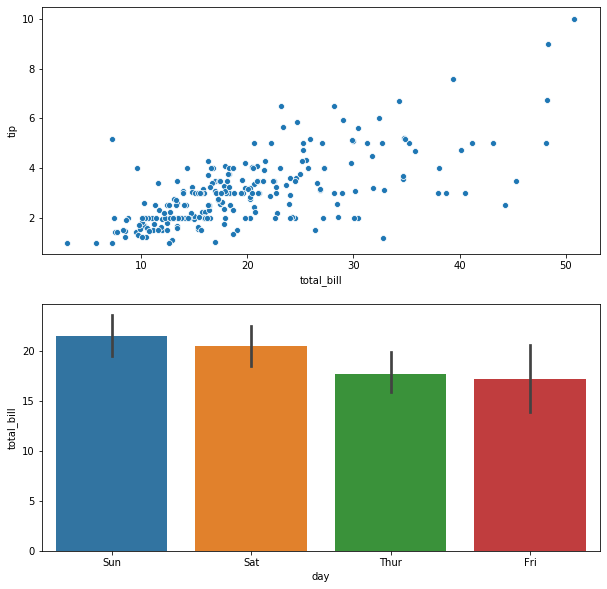

In [3]:
# 使用matplotlib定义axes
fig,[ax1,ax2] = plt.subplots(2,1,figsize=(10,10))

# 使用seaborn进行绘图
sns.scatterplot(x="total_bill",y="tip",data=tips,ax=ax1)
sns.barplot(x="day",y="total_bill",data=tips,ax=ax2)

## 2 FacetGrid基本使用

先创建一个FacetGrid对象，然后再调用这个对象的map方法。其中map方法的第一个参数是一个函数，后续map将调用这个函数来绘制图形。后面的参数就是传给这个函数的参数。示例代码如下：

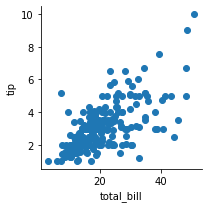

In [4]:
# 创建一个FacetGrid对象
g = sns.FacetGrid(tips)

# 调用map函数进行绘制图形
g.map(plt.scatter,"total_bill","tip")

其中第一个参数是可以绘制Axes图，并且可以接收color参数的函数。可以取的值如下：

|参数	|描述	|对应使用了FacetGrid函数|
|:--:|:--:|:--|
|plt.plot/sns.lineplot|	绘制折线图	|sns.relplot(kind="line")
|plt.hexbin|	绘制六边形图形	|sns.jointplot(kind="hex")
|plt.hist|	绘制直方图	|sns.distplot
|plt.scatter/sns.scatterplot|	绘制散点图	|sns.relplot(kind="scatter")
|sns.stripplot	|绘制分类散点图	|sns.catplot(kind="strip")
|sns.swarmplot	|绘制散开来的分类散点图	|sns.catplot(kind="swarm")
|sns.boxplot	|绘制箱型图	|sns.catplot(kind="box")
|sns.violinplot	|绘制小提琴图	|sns.catplot(kind="violin")
|sns.pointplot	|绘制点线图	|sns.catplot(kind="point")
|sns.barplot	|绘制条形图	|sns.catplot(kind="bar")
|sns.countplot	|绘制数量柱状图	|sns.catplot(kind="count")
|sns.regplot	|绘制带有回归线的散点图	|sns.lmplot

### 2.1 绘制多个图形

FacetGrid可以通过col和row参数，来在一个Figure上绘制多个图形，其中col和row都是数据集中的某个列的名字。只要指定这个名字，那么就会自动的按照指定列的值的个数绘制指定个数的图形。示例代码如下：

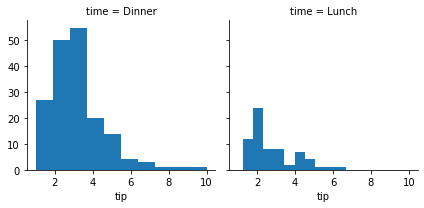

In [5]:
# 创建一个FacetGrid对象，并添加col参数
g = sns.FacetGrid(tips,col="time",col_wrap=2)

# 绘制线性回归模型
g.map(plt.hist,"tip")

### 2.2 添加颜色观察字段

可以通过添加hue参数来控制每个图中元素的颜色来观察其他的字段。示例代码如下：

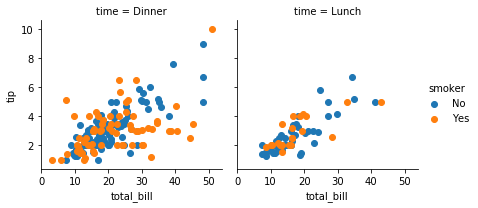

In [6]:
# 创建一个FacetGrid对象，并添加col参数
g = sns.FacetGrid(tips,col="time",hue="smoker")

# 绘制线性回归模型
g.map(plt.scatter,"total_bill","tip")

# 添加图例
g.add_legend()

* 也可以通过hue_kws参数来添加hue散点的属性，比如设置散点的样式等。

### 2.3 设置每个图形的尺寸

使用FacetGrid绘制出图形后，有时候我们想设置每个图形的尺寸或者是宽高比，那么我们可以通过在FacetGrid中设置height和aspect来实现，其中height表示的是每个图形的尺寸（默认是宽高一致），aspect表示的是宽度/高度的比例。示例代码如下：

D:\python\anaconda3\envs\sde_env\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


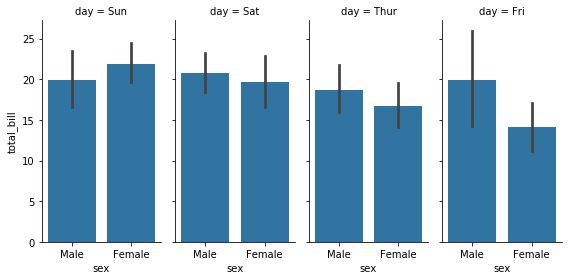

In [7]:
# 创建FacetGrid对象，并设置height和aspect
g = sns.FacetGrid(tips,col="day",height=4,aspect=0.5)
g.map(sns.barplot,"sex","total_bill")

* 它默认会从DataFrame中推导分类的顺序。当然，我们完全可以通过*_order参数直接指定某个维度变量的顺序：

In [8]:
# 按照数量得到day的索引 
ordered_days = tips.day.value_counts().index
ordered_days

Index(['Sat', 'Sun', 'Thur', 'Fri'], dtype='object')

D:\python\anaconda3\envs\sde_env\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


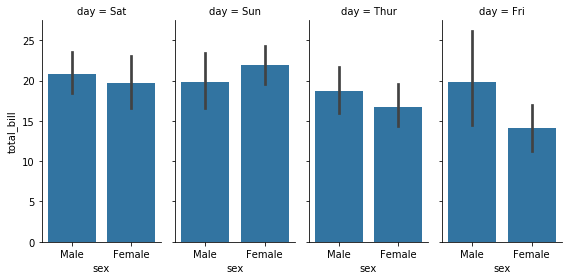

In [9]:
# 创建FacetGrid对象，并添加col_order
g = sns.FacetGrid(tips,col="day",height=4,aspect=0.5,col_order=ordered_days)

# 绘制条形图
g.map(sns.barplot,"sex","total_bill")

### 2.4 设置图例

默认情况下，不会添加图例，我们可以通过g.add_legend()来添加图例。示例代码如下：

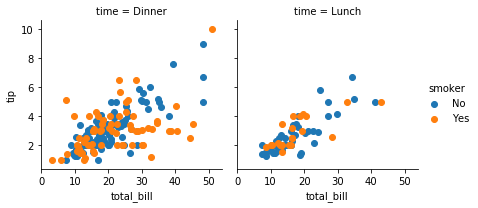

In [10]:
# 创建一个FacetGrid对象
g = sns.FacetGrid(tips,col="time",hue="smoker")

# 绘制线性回归模型
g.map(plt.scatter,"total_bill","tip")

# 添加图例
g.add_legend()

另外还可以：
* 通过title来控制图例的标题。
* 通过label_order来控制图例元素的顺序。

示例代码如下：

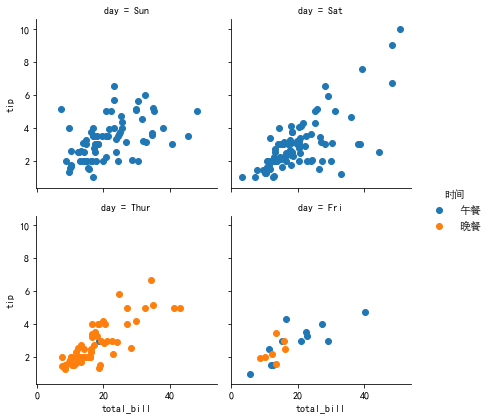

In [11]:
# 创建一个FacetGrid对象
g = sns.FacetGrid(tips,col="day",hue="time",col_wrap=2)

# 绘制散点图
g.map(plt.scatter,"total_bill","tip")

# 设置字体为黑体（可以显示中文）
sns.set(rc={"font.sans-serif":"simhei"})

# 添加time的中文解释
new_labels = ['午餐','晚餐']

# 用title控制图例的标题
g.add_legend(title="时间")

# 修改图例
for t,l in zip(g._legend.texts,new_labels):
    t.set_text(l)

### 2.5 设置标题

设置标题可以通过g.set_titles(template=None,row_template=None,col_template=None)来实现，这三个参数分别代表的意义如下：

* template：给图设置标题，其中有{row_var}：绘制每行图像的名称，{row_name}：绘制每行图像的值，{col_var}：绘制每列图像的名称，{col_name}：绘制每列图像的值这几个参数可以使用。


* col_template：给图像设置列的标题。其中有{col_var}以及{col_name}可以使用。


* row_template：给图像设置行的标题。其中有{row_var}以及{row_name}可以使用。


示例代码如下：

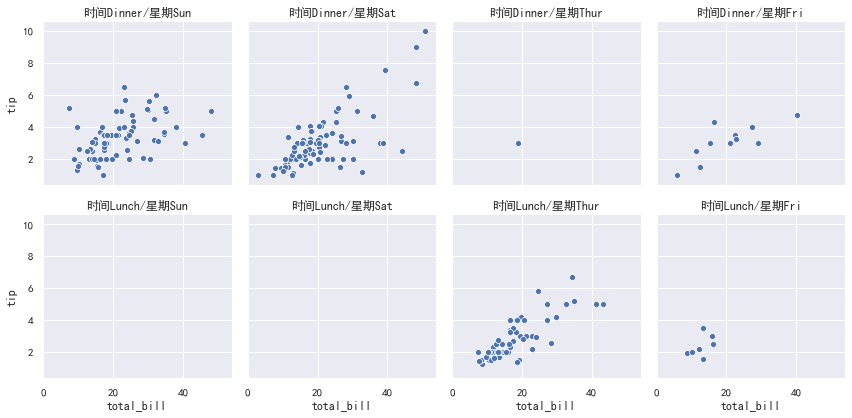

In [12]:
# 创建一个FacetGrid对象
g = sns.FacetGrid(tips,col="day",row="time")

# 绘制散点图
g.map(sns.scatterplot,"total_bill","tip")

# 设置标题
g.set_titles(template="时间{row_name}/星期{col_name}")

### 2.6 设置坐标轴

* g.set_axis_labels(x_var,y_var)：一次性设置x和y的坐标的标题。
* g.set_xlabels(label)：设置x轴的标题。
* g.set_ylabels(label)：设置y轴的标题。
* g.set(xticks,yticks)：设置x和y轴的刻度。
* g.set_xticklabels(labels)：设置x轴的刻度文字。
* g.set_yticklabels(labels)：设置y轴的刻度文字。

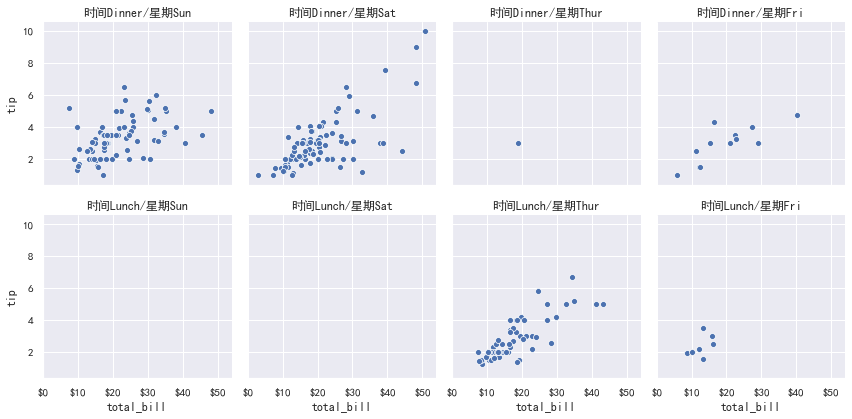

In [13]:
# 创建一个FacetGrid对象
g = sns.FacetGrid(tips,col="day",row="time")

# 绘制散点图
g.map(sns.scatterplot,"total_bill","tip")

# 设置标题
g.set_titles(template="时间{row_name}/星期{col_name}")

# 设置坐标轴
g.set(xticks=range(0,60,10),xticklabels=['$0','$10','$20','$30','$40','$50'])

还可以通过g.set和g.fig来设置子图Axes和画布Figure的属性。

* g.set：g.set方法可以对FacetGrid下的每个子图Axes设置属性，比如可以设置每个Axes的facecolor等。


* g.fig：可以获取到当前的Figure对象。然后通过Figure对象再可以设置其他的属性，比如dpi等。